<a href="https://colab.research.google.com/github/andr0shka/crispy-octo-dollop/blob/main/Exploratory_data_analysis_for_store_chain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# @title Processing data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive


drive.mount("/content/drive")
%cd /content/drive/MyDrive/PythonModule

events = pd.read_csv('events.csv')
products = pd.read_csv('products.csv')
countries = pd.read_csv('countries.csv')


# print("Events Dataset Overview:\n")
# print(events.info())
# print(events.describe())
# print(events.head())

# print("\nProducts Dataset Overview:\n")
# print(products.info())
# print(products.describe())
# print(products.head())

# print("\nCountries Dataset Overview:\n")
# print(countries.info())
# print(countries.describe())
# print(countries.head())


# rename columns
events.rename(columns={
    'Order ID': 'order_id',
    'Order Date': 'order_date',
    'Ship Date': 'ship_date',
    'Order Priority': 'order_priority',
    'Country Code': 'country_code',
    'Product ID': 'product_id',
    'Sales Channel': 'sales_channel',
    'Units Sold': 'units_sold',
    'Unit Price': 'unit_price',
    'Unit Cost': 'unit_cost',
    'item_type': 'category'
}, inplace=True)

countries.rename(columns={
    'name': 'country',
    'alpha-2': 'alpha_2',
    'alpha-3': 'alpha_3',
    'region': 'region',
    'sub-region': 'sub_region'
}, inplace=True)


# print("\nColumns in Events Dataset:", events.columns)
# print("Columns in Products Dataset:", products.columns)
# print("Columns in Countries Dataset:", countries.columns)


# missing values
print("\nMissing Values in Events Dataset:\n", events.isnull().sum())
print("Missing Values in Products Dataset:\n", products.isnull().sum())
print("Missing Values in Countries Dataset:\n", countries.isnull().sum())


# duplicates
events = events.drop_duplicates()
products = products.drop_duplicates()
countries = countries.drop_duplicates()


# # data types
# print("\nEvents Data Types:\n", events.dtypes)
# print("Products Data Types:\n", products.dtypes)
# print("Countries Data Types:\n", countries.dtypes)


# convert date
date_columns = [col for col in events.columns if 'date' in col.lower()]
for col in date_columns:
    events[col] = pd.to_datetime(events[col], errors='coerce')


# merge datasets
data = events.merge(products, left_on='product_id', right_on="id", how='left')
data = data.merge(countries, left_on='country_code', right_on="alpha_3", how='left')


# drop columns
data.drop(columns=['id'], inplace=True, errors='ignore')


# profit
data['profit'] = data['units_sold'] * (data['unit_price'] - data['unit_cost'])

data['sales_channel'] = data['sales_channel'].str.strip().str.capitalize()


# metrics
num_orders = data['order_id'].nunique()
total_profit = data['profit'].sum()
num_countries = data['country'].nunique()

print(f"Total Orders: {num_orders}")
print(f"Total Profit: {total_profit}")
print(f"Number of Countries: {num_countries}")

# by category
category_analysis = data.groupby('item_type').agg({'profit': 'sum', 'order_id': 'count'})
print("\nCategory Analysis:\n", category_analysis)

channel_percentage = data['sales_channel'].value_counts(normalize=True) * 100
print(channel_percentage)

sales_channel
Offline    50.150376
Online     49.849624
Name: proportion, dtype: float64


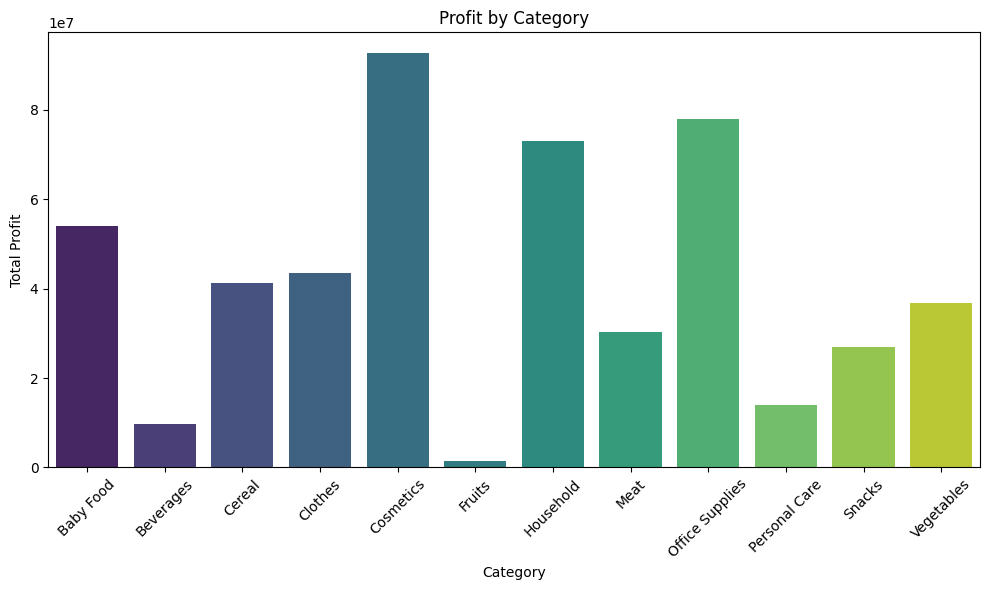

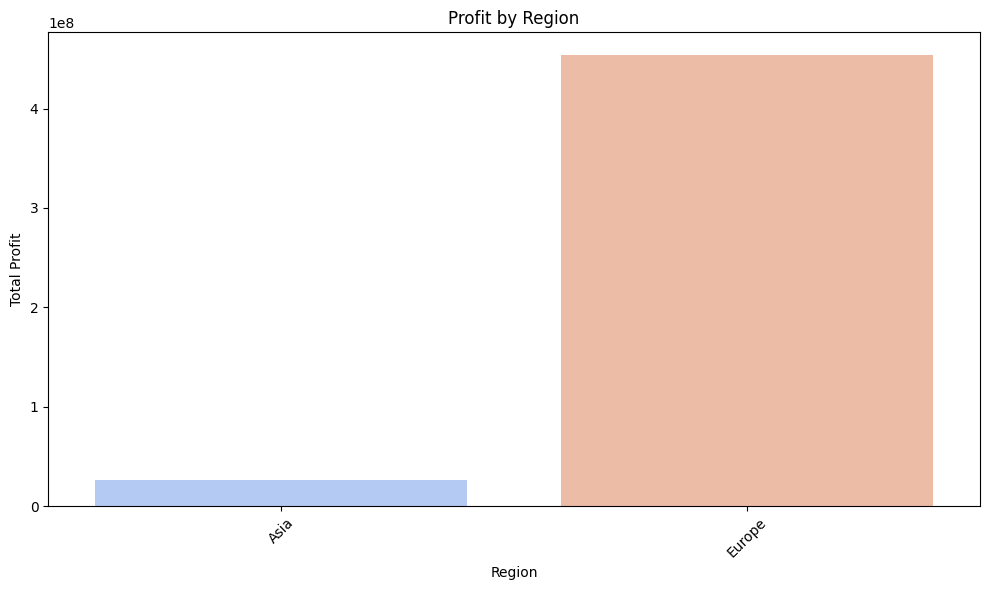

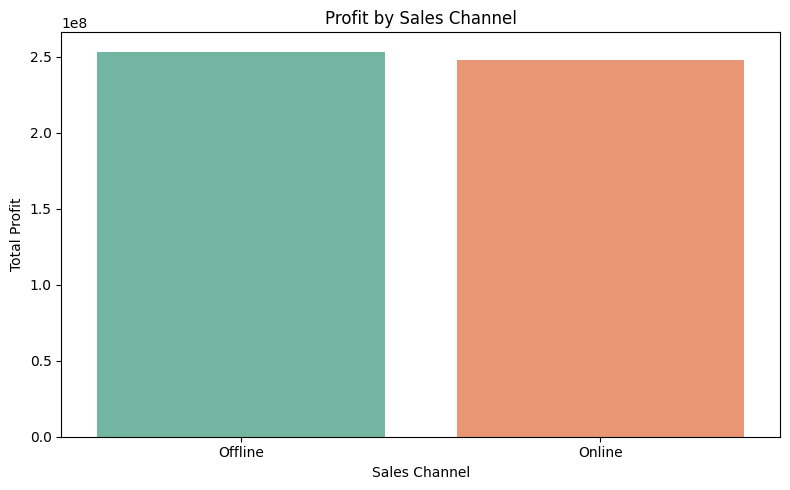

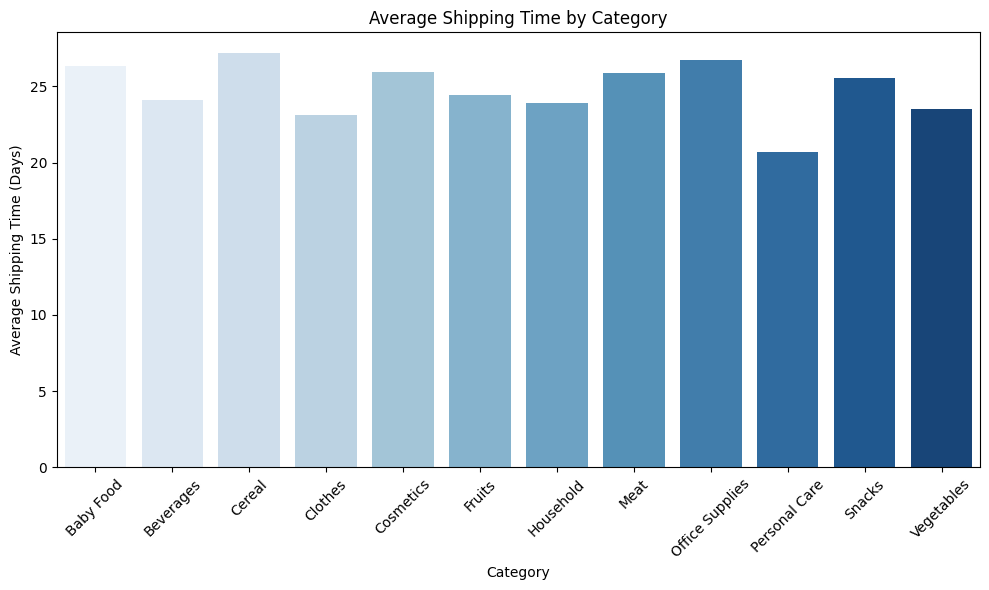

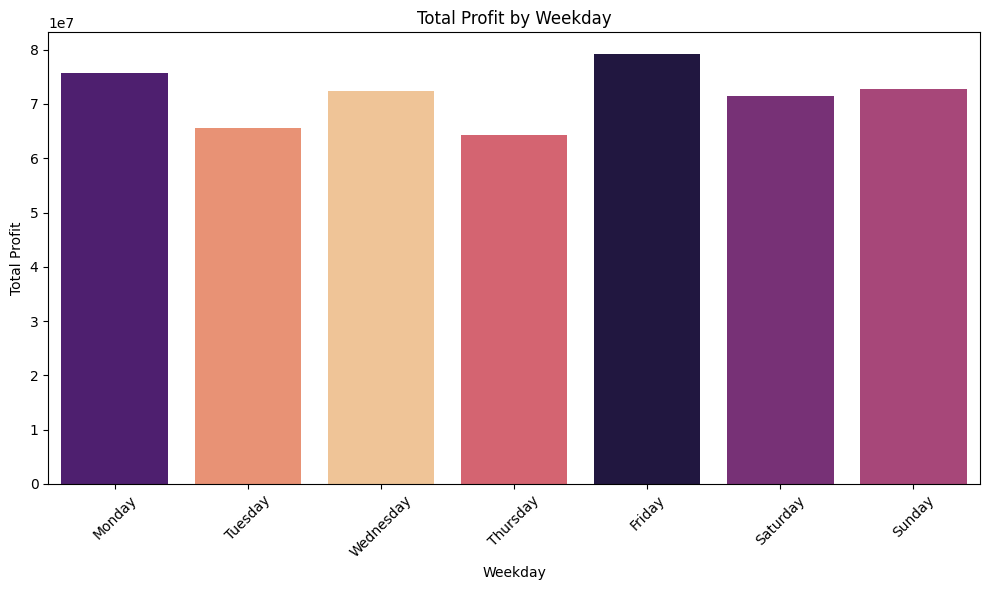

In [ ]:
# @title Visuals
# Profit by Category
category_analysis = data.groupby('item_type').agg({
    'units_sold': 'sum',
    'unit_price': 'mean',
    'unit_cost': 'mean'
})
category_analysis['total_profit'] = ((category_analysis['unit_price'] - category_analysis['unit_cost']) * category_analysis['units_sold'])

plt.figure(figsize=(10, 6))
sns.barplot(x=category_analysis.index, y=category_analysis['total_profit'], hue=category_analysis.index, palette='viridis')
plt.title("Profit by Category")
plt.ylabel("Total Profit")
plt.xlabel("Category")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Profit by Region
region_analysis = data.groupby('region').agg({
    'units_sold': 'sum',
    'unit_price': 'mean',
    'unit_cost': 'mean'
})
region_analysis['total_profit'] = ((region_analysis['unit_price'] - region_analysis['unit_cost']) * region_analysis['units_sold'])

plt.figure(figsize=(10, 6))
sns.barplot(x=region_analysis.index, y=region_analysis['total_profit'], hue=region_analysis.index, palette='coolwarm')
plt.title("Profit by Region")
plt.ylabel("Total Profit")
plt.xlabel("Region")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Profit by Sales Channel
channel_analysis = data.groupby('sales_channel').agg({
    'profit': 'sum'
})

plt.figure(figsize=(8, 5))
sns.barplot(x=channel_analysis.index, y=channel_analysis['profit'], hue=channel_analysis.index, palette='Set2')
plt.title("Profit by Sales Channel")
plt.ylabel("Total Profit")
plt.xlabel("Sales Channel")
plt.tight_layout()
plt.show()

# Average Shipping Time by Category
data['shipping_time'] = (data['ship_date'] - data['order_date']).dt.days
shipping_analysis = data.groupby('item_type').agg({
    'shipping_time': 'mean',
    'units_sold': 'sum'
})

plt.figure(figsize=(10, 6))
sns.barplot(x=shipping_analysis.index, y=shipping_analysis['shipping_time'], hue=shipping_analysis.index, palette='Blues')
plt.title("Average Shipping Time by Category")
plt.ylabel("Average Shipping Time (Days)")
plt.xlabel("Category")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Total Profit by Weekday
data['order_weekday'] = data['order_date'].dt.day_name()
weekday_analysis = data.groupby('order_weekday').agg({
    'profit': 'sum'
})

plt.figure(figsize=(10, 6))
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sns.barplot(x=weekday_analysis.index, y=weekday_analysis['profit'], order=weekday_order, hue=weekday_analysis.index, palette='magma')
plt.title("Total Profit by Weekday")
plt.ylabel("Total Profit")
plt.xlabel("Weekday")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Data Analysis Report

## 1. Основні метрики

### Основна інформація:
- **Загальна кількість замовлень:** 1,330
- **Загальний прибуток:** $501,434,459
- **Кількість країн:** 45

### Аналіз за категоріями:
- **Найбільший прибуток:** Baby Food (\$53,940,997.16)
- **Найменший прибуток:** Fruits (\$1,425,929.52)

### Аналіз каналів продажу:
- **Офлайн:** 50.15% прибутку
- **Онлайн:** 49.85% прибутку

### Прибуток за регіонами:
- **Європа:** Домінуючий регіон за прибутком
- **Азія:** Найменший прибуток

### Прибуток за днями тижня:
- **Найбільший прибуток:** П'ятниця та Понеділок
- **Найменший:** Вівторок

### Час доставки:
- **Середній час доставки найбільший:** у категорії Office Supplies
- **Найменший час доставки:** у Personal Care

## 2. Бізнес аналіз
Найприбутковішими категоріями товарів є Baby Food, Office Supplies та Cosmetics, що свідчить про необхідність зосередитися на цих групах для максимізації доходів. Основним регіоном з точки зору прибутковості є Європа, що може свідчити про стабільний попит на товари компанії в цьому регіоні. Натомість Азія демонструє найнижчий рівень прибутковості, що може вказувати на потребу в оптимізації маркетингових стратегій або логістики для покращення результатів у цьому регіоні. Варто звернути увагу на оптимізацію логістичних процесів, зокрема у категорії Office Supplies, де час доставки найдовший. Серед днів тижня найбільший прибуток спостерігається у п’ятницю та понеділок, що може вказувати на активізацію покупців у ці дні, тоді як у вівторок фіксується найнижчий прибуток.

